In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'

In [3]:
df = pd.read_csv(DATASET)

## Описание данных

Sex - номинальный - M, F и I (младенцы)

Length - непрерывная - мм - Самый длинный размер раковины

Diameter - непрерывный - мм - перпендикулярен длине

Height - непрерывный - мм - с мясом в раковине

Whole weight - непрерывный - граммы - целое морское ушко

Shucked weight - непрерывный - в граммах

Viscera weight - непрерывный - в граммах - вес потрохов (после обескровливания)

Shell weight - непрерывный - в граммах - после сушки

Rings - целое число - +1,5 указывает возраст в годах (целевой показатель)

# EDA

In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().mean() * 100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000


In [8]:
diametr = df['Diameter'].median()

df['Diameter'].fillna(diametr, inplace=True)

<ipython-input-8-3aa7d8a76482>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diameter'].fillna(diametr, inplace=True)


In [9]:
whole = df['Whole weight'].median()

df['Whole weight'].fillna(whole, inplace=True)

<ipython-input-9-38bdfdc85893>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Whole weight'].fillna(whole, inplace=True)


In [10]:
shell = df['Shell weight'].median()

df['Shell weight'].fillna(shell, inplace=True)

<ipython-input-10-0920384c4b81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shell weight'].fillna(shell, inplace=True)


In [11]:
df.isnull().sum().sum()

0

In [12]:
df['Sex'] = df['Sex'].replace('f', 'F')

In [13]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

## Было проведено исследование данных. В ходе которого выявляено, что датасен не имеет дупликатов, но имеет пропуски, которые заменены на медиану столбца.

# Шаг 1. Постороение моделей

## Байесовская модель

<Axes: >

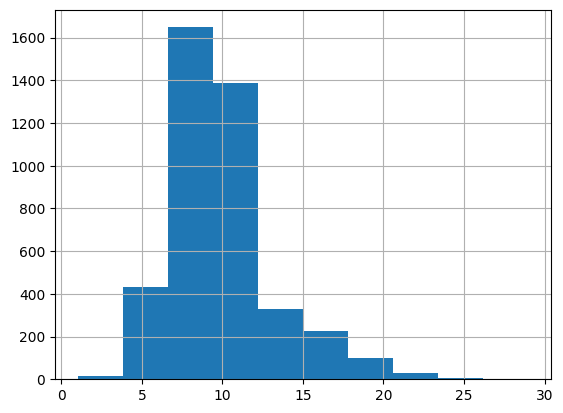

In [14]:
df.Rings.hist()

### Данные в целевой переменной не являются категориальными. Поэтому, чтобы использовать метод Байеса необходимо разделим признак на два столбца

In [15]:
X = df.drop(columns=['Rings','Sex'])
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [16]:
y = (df['Rings'] < 10).astype(int)

In [17]:
y.value_counts()

,count
Rings,
1,2096
0,2081


### Разбивка данных

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3823,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274
3956,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220
3623,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
2183,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350


## Обучение и предсказание

In [20]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

## Проверка правильности ответов

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, gb_pred)

0.7301435406698564

## Матрица ошибок

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, gb_pred)

array([[376, 135],
       [147, 387]])

## Вывод: Данная модель дала нам результат 73%. Хотелось бы побольше. Необходимо использовать другие модели

## KKN модель классификации

### Подготовка данных

In [23]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [24]:
y.head()

,Rings
0,0
1,1
2,1
3,0
4,1


В данном случае будем использовать те же данные, которые были использованы в предыдущем шаге. Так как использует модель классификации

### Обучение и предсказание

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

knn_cl_pred = knn_cl.predict(X_test)

In [26]:
accuracy_score(y_test, knn_cl_pred)

0.7732057416267942

### Результат лучше, но принято решение использовать масштабирование для улучшения результатов


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train_scaler, y_train)
knn_cl_pred = knn_cl.predict(X_test_scaler)

In [28]:
accuracy_score(y_test, knn_cl_pred)

0.7703349282296651

### Результат никак не улучшился. Скорее всего данные никак не поменялись

## KKN модель регрессии

### Подготовка данных

In [29]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [30]:
y = df['Rings']

In [31]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


### Разбивка данных

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Обучение данных

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(y_test, knn_reg_pred)

1.5779904306220096

In [35]:
r2_score(y_test, knn_reg_pred)

0.5163489191278392

## Результат на половину. Это значит не идеально предсказывает модель

## Линейная регрессия

### Подготовка данных

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [37]:
mean_absolute_error(y_test, model_pred)

1.6651728674202646

In [38]:
r2_score(y_test, model_pred)

0.5012275799093167

Данная модель показала аналогичные результаты с предыдущим

## Вывод: Данные модели не подходят в данном случае по причине:
1. Данные не подходят
2. Использовать другие подходы для разбиения данных

# Шаг 2. Подбор гиперпараметров для улучшения результатов

### Подготовка данных

In [39]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [40]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [41]:
y = (df['Rings'] < 10).astype('int')

In [42]:
y.head()

,Rings
0,0
1,1
2,1
3,0
4,1


### Процесс обучения

In [43]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn_model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30, 1),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(knn_model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [46]:
gs.best_score_

0.7883141762452107

In [47]:
gs.best_params_

{'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}

### Предсказание

In [48]:
pred = gs.best_estimator_.predict(X_test)

In [49]:
accuracy_score(y_test, pred)

0.783732057416268

## Вывод: Используя подбор парамертов получилось улучшить модель

# Шаг 3. Внедрение категориальных признаков в модель

### Разбиение данных

In [50]:
X_full = df.drop(columns='Rings')

In [51]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [52]:
X_test_full.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64


## Использование кодирования данных One-Hot Encoded

In [53]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 3823 to 860
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
dtypes: float64(7), object(1)
memory usage: 220.2+ KB


In [54]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['Sex']
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

ct = ColumnTransformer([
    ('one', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_trans = ct.fit_transform(X_train_full)
X_test_trans = ct.transform(X_test_full)

In [55]:
new_features = list(ct.named_transformers_['one'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [56]:
X_train_transformed = pd.DataFrame(X_train_trans, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_trans, columns=new_features)

X_train_transformed.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.0,0.0,0.729730,0.672269,0.119469,0.374358,0.317754,0.345622,0.271550
1,1.0,0.0,0.0,0.594595,0.571429,0.123894,0.242253,0.188299,0.164582,0.217738
2,0.0,0.0,1.0,0.790541,0.798319,0.154867,0.559943,0.496638,0.460829,0.402093
3,0.0,0.0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
4,0.0,0.0,1.0,0.567568,0.579832,0.137168,0.285638,0.157028,0.151415,0.347285


In [60]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 1),
          'weights' : ['uniform', 'distance']}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=5)
gs.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [61]:
gs.best_score_, gs.best_params_

(0.7822477650063857, {'n_neighbors': 17, 'weights': 'distance'})

In [62]:
pred = gs.best_estimator_.predict(X_test_transformed)

accuracy_score(y_test_full, pred)

0.7741626794258373

In [63]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsClassifier())
    ])

pipe.fit(X_train_full, y_train_full)

pred_pipe = pipe.predict(X_test_full)

In [64]:
accuracy_score(y_test_full, pred_pipe)

0.7703349282296651

## Вывод: Улучшить модель не получилось скорее всего из-за малого количества данных

## Explainer Dashboard

In [68]:
!pip install explainerdashboard -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.6 MB/s eta 0:00:00


In [69]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [81]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test_transformed.iloc[:100], y_test_full.iloc[:100])

splitting pipeline...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [82]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarni

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarni

Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [84]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


TypeError: 'NoneType' object cannot be interpreted as an integer

## Вывод:
1. По Explainer Dashboard можно говорить о том, что Shell weight имеет сильное влияние на целевую переменную. Как с точки зрения SHAP и Permutation.
2. Sex_M отрицательно влияет на целевую переменную по Permutation Importances
